<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Apr 19 16:48:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   40C    P5              9W /   60W |     698MiB /   4096MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [24]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device  = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu126


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

* object detection
* image segmentaion
* Image classification

1. Self-driving cars, such as Tesla using computer vision to percieve what's happening on the road. See Tesla AI day for more - https://youtu.be/j0z4FweCy4M
2. Healthcare imaging, such as using computer vision to help interpret X-rays. Google also uses computer vision for detecting polyps in the intenstines - https://ai.googleblog.com/2021/08/improved-detection-of-elusive-polyps.html
3. Security, computer vision can be used to detect whether someone is invading your home or not - https://store.google.com/au/product/nest_cam_battery?hl=en-GB

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

overfitting is when the model learn the training data so well but can't genralize well to the test data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

See this article for some ideas: https://elitedatascience.com/overfitting-in-machine-learning 

3 ways to prevent overfitting:
1. **Regularization techniques** - You could use [dropout on your neural networks](https://en.wikipedia.org/wiki/Dilution_(neural_networks)), dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weights/patterns.
2. **Use a different model** - maybe the model you're using for a specific problem is too complicated, as in, it's learning the data too well because it has so many layers. You could remove some layers to simplify your model. Or you could pick a totally different model altogether, one that may be more suited to your particular problem. Or... you could also use [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning) (taking the patterns from one model and applying them to your own problem). 
3. **Reduce noise in data/cleanup dataset/introduce data augmentation techniques** - If the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be to remove the noise/clean up the dataset or if this doesn't, you can introduce artificial noise through the use of data augmentation to artificially increase the diversity of your training dataset.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [119]:
from torchvision  import datasets
from torchvision.transforms import ToTensor

# Setup training data
train_data = datasets.MNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
        target_transform=None
)

# Setup test data
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 9.91M/9.91M [00:14<00:00, 670kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 238kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.51MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [120]:
classnames = train_data.classes
classnames

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

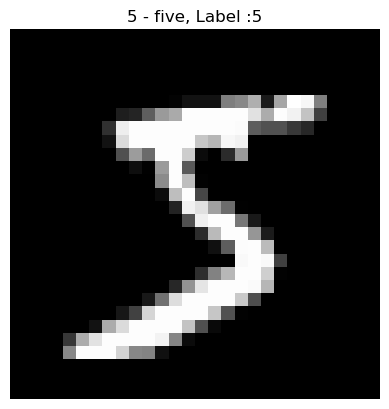

In [121]:
import matplotlib.pyplot as plt

image, label = train_data[0]
plt.imshow(image.squeeze(), cmap="grey")
plt.axis(False)
plt.title(f"{classnames[label]}, Label :{label}");

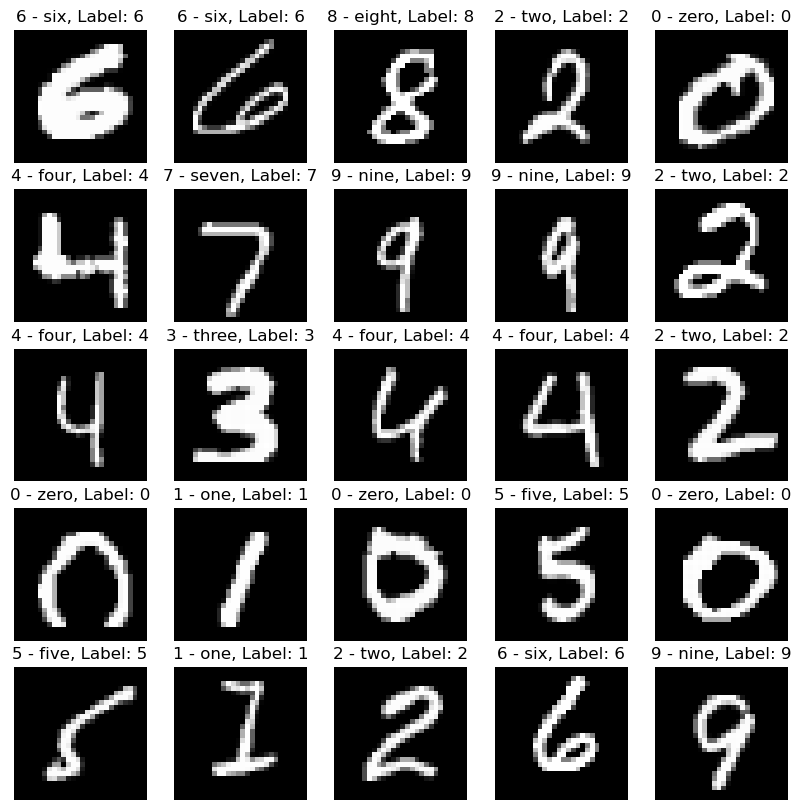

In [122]:
torch.manual_seed(42)
fig = plt.figure(figsize=(10,10))
rows, cols = 5,5
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="grey")
    plt.title(f"{classnames[label]}, Label: {label}")
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [123]:
from torch.utils.data import DataLoader

BATCH_SiZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SiZE,
                              shuffle=True )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SiZE,
                             shuffle=True)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [133]:
from torch import nn

class MNISTModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
        
    def forward(self, x):
            
        x = self.conv_block1(x)
        # print(f"out shape of conv_block 1: {x.shape}")
        x = self.conv_block2(x)
        # print(f"out shape of conv_block 2: {x.shape}")
        x = self.classifier(x)
        # print(f"out shape of classifier: {x.shape}")               
        return x
    
model_2 = MNISTModel(input_shape=1,
                            hidden_units=10,
                            output_shape=len(classnames)).to(device)
            

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [134]:
from timeit import default_timer as timer 
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Print how lon does a device takes to train"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time



In [135]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [188]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training step with model on a data_loader"""
    
    train_loss, train_acc = 0 , 0

    # Put model into training mode
    model.train()
    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)
        # Forward pass (outputs the raw logits from the model)
        y_pred = model(X)
        # Calculate the loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss 
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction lables 
        optimizer.zero_grad()
        loss.backward()
        # Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()
    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5} - Train acc: {train_acc:.2f}%")

In [189]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.modules,
              accuracy_fn,
              device: torch.device=device):
    """Performs a testing loop step on model going over data_loader"""
    test_loss, test_acc = 0, 0

    # Put the model on eval mode
    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            # Put data on target device 
            X, y = X.to(device), y.to(device)
            # Forward pass (Outputs raw logits)
            test_pred = model(X) 
            # Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y)
            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) 
        
        # Calculate the test loss average per batch
        test_loss /= len(data_loader)
        # Calculate the test accuracy average per batch
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f} - Test acc: {test_acc:.2f}%")

In [138]:
# CPU
from tqdm import tqdm
from timeit import default_timer as Timer

model_2 = MNISTModel(input_shape=1,
                            hidden_units=10,
                            output_shape=len(classnames)).to("cpu")

# setup oss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

torch.manual_seed(42)

train_time_start_cpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model=model_2.to("cpu"),
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device="cpu")
    test_step(model=model_2.to("cpu"),
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device="cpu")
    
    
train_time_end_cpu = timer()

total_train_time_cpu = print_train_time(train_time_start_cpu, train_time_end_cpu, "cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.27453


 20%|██        | 1/5 [00:34<02:18, 34.68s/it]

Test Loss: 0.07149 - Test acc: 97.61%
Epoch: 1
------
Train loss: 0.07498


 40%|████      | 2/5 [01:10<01:45, 35.14s/it]

Test Loss: 0.05564 - Test acc: 98.20%
Epoch: 2
------
Train loss: 0.059925


 60%|██████    | 3/5 [01:47<01:11, 35.94s/it]

Test Loss: 0.07077 - Test acc: 97.78%
Epoch: 3
------
Train loss: 0.049615


 80%|████████  | 4/5 [02:20<00:34, 34.86s/it]

Test Loss: 0.04891 - Test acc: 98.36%
Epoch: 4
------
Train loss: 0.045041


100%|██████████| 5/5 [02:55<00:00, 35.09s/it]

Test Loss: 0.04416 - Test acc: 98.47%
Train time on cpu: 175.453 seconds


In [190]:
# GPU
from tqdm import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

model_2 = MNISTModel(input_shape=1,
                            hidden_units=10,
                            output_shape=10).to(device)

# setup oss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


train_time_start_gpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
    
train_time_end_gpu = timer()

total_train_time_gpu = print_train_time(train_time_start_gpu, train_time_end_gpu, device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.28169 - Train acc: 90.73%


 20%|██        | 1/5 [00:22<01:29, 22.45s/it]

Test Loss: 0.06264 - Test acc: 97.90%
Epoch: 1
------
Train loss: 0.07365 - Train acc: 97.71%


 40%|████      | 2/5 [00:45<01:08, 22.82s/it]

Test Loss: 0.04789 - Test acc: 98.42%
Epoch: 2
------
Train loss: 0.056351 - Train acc: 98.21%


 60%|██████    | 3/5 [01:08<00:46, 23.06s/it]

Test Loss: 0.04868 - Test acc: 98.37%
Epoch: 3
------
Train loss: 0.048311 - Train acc: 98.47%


 80%|████████  | 4/5 [01:34<00:24, 24.08s/it]

Test Loss: 0.03743 - Test acc: 98.64%
Epoch: 4
------
Train loss: 0.042935 - Train acc: 98.64%


100%|██████████| 5/5 [01:55<00:00, 23.19s/it]

Test Loss: 0.05486 - Test acc: 98.30%
Train time on cuda: 115.951 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

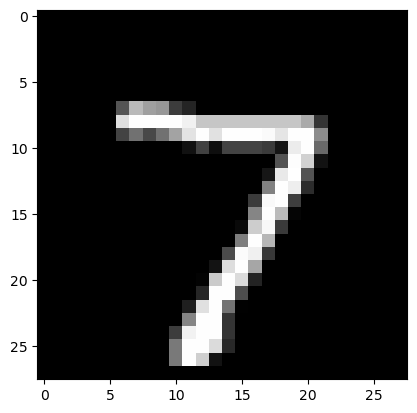

In [166]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray");

In [167]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_2(test_data[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

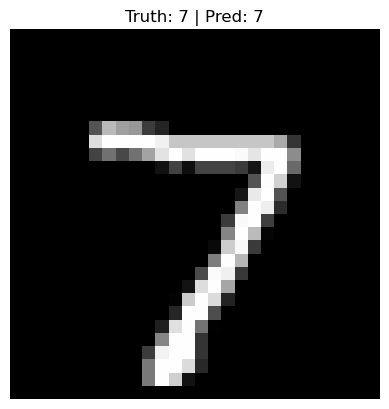

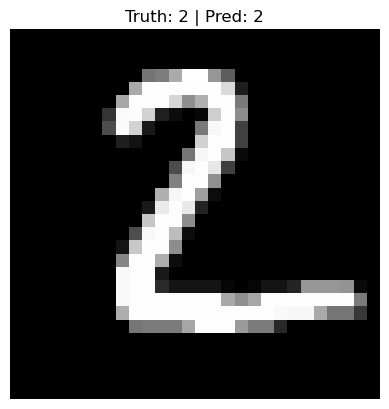

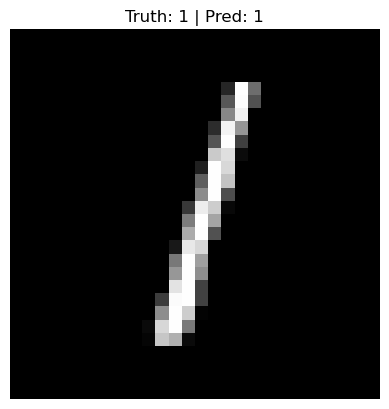

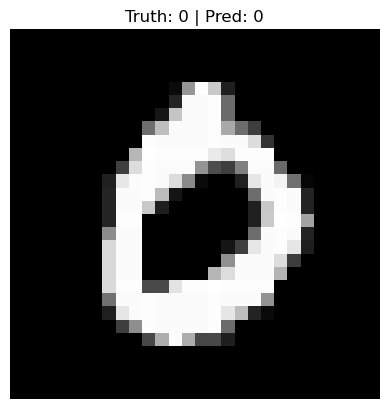

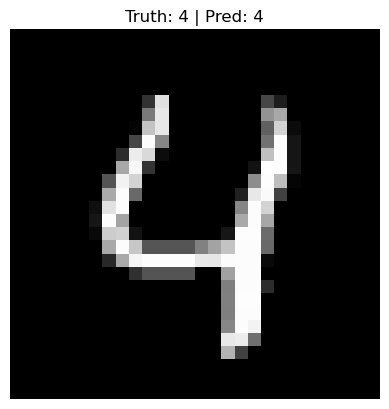

In [169]:
num_to_plot = 5 
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_2(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}") 
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [241]:
from tqdm.auto import tqdm

def make_predicitons(model: torch.nn.modules,
                     dataloader: torch.utils.data.DataLoader,
                     device: torch.device = device):
    # Make predictions with trained model       
    model.eval()
    # Get predictions and true labels
    y_preds = []
    y_true = []
    with torch.inference_mode():
        for X, y in tqdm(dataloader, desc="Getting predictions and true labels..."):
            # Send the data and targets to target device
            X, y = X.to(device), y.to(device)
            # Forward pass
            y_logits = model(X)
            # Turn predictions from logits -> predictions probabilities -> prediction labels
            y_pred_labels = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            # Put predcition & targets on cpu for evaluation 
            y_preds.append(y_pred_labels.cpu())
            y_true.append(y.cpu())
            # Flatten tensors
    y_preds_tensor = torch.cat(y_preds)
    y_true_tensor = torch.cat(y_true)
    return y_preds_tensor , y_true_tensor

y_preds_tensor, y_true_tensor =  make_predicitons(model=model_2,
                                                    dataloader=test_dataloader,
                                                    device=device)



Getting predictions and true labels...: 100%|██████████| 313/313 [00:02<00:00, 117.56it/s]


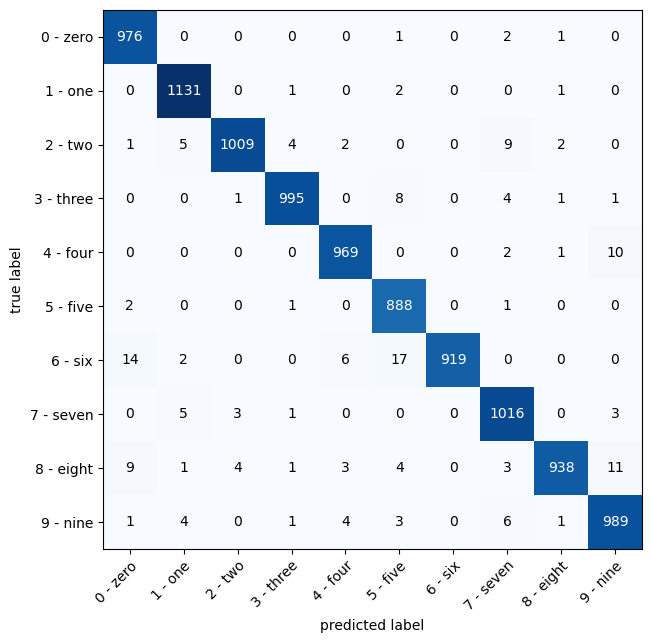

In [242]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(classnames))
confmat_tensor = confmat(preds=y_preds_tensor, target=y_true_tensor)


# Plot it
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=classnames,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [246]:
rand_tensor = torch.rand(size=[1, 3, 64 ,64])
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)
print(f"Random tensor original shape: {rand_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(rand_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?